# **Sentiment Analysis of Amazon Product Reviews Using Lexicon-Based Method and Support Vector Machine Algorithm**

Laras Kirana Anindita - 2106653035

UTS Analisis Data Tidak Terstruktur

Dataset: https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews

Objektif dari analisis sentimen adalah untuk mengidentifikasi, mengukur, dan memahami sentimen atau opini yang terkandung dalam teks atau data tertentu.

# Import Library dan Datasets

Download all libraries that are gonna be used.

In [ ]:
#install libraries
!conda install -y gdown
!pip install google-play-scraper

/bin/bash: line 1: conda: command not found


In [ ]:
!pip install PySastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 5.0 MB/s eta 0:00:00


**Import Library**

In [ ]:
from google_play_scraper import Sort, reviews_all, reviews
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
# from google_play_scraper import Sort, reviews_all, reviews
import nltk
# import calendar
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Disable all warnings
import warnings
warnings.filterwarnings('ignore')

**Import Dataset**

Dataset diambil dari: https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews/code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset/df1.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
1,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
2,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
3,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
4,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...


# Data Exploration

**Data Coloumn**

In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

**Data Type**

In [ ]:
datatype = df.info() #melihat tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56845 entries, 0 to 56844
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      56845 non-null  int64 
 1   ProductId               56845 non-null  object
 2   UserId                  56845 non-null  object
 3   ProfileName             56845 non-null  object
 4   HelpfulnessNumerator    56845 non-null  int64 
 5   HelpfulnessDenominator  56845 non-null  int64 
 6   Score                   56845 non-null  int64 
 7   Time                    56845 non-null  int64 
 8   Summary                 56844 non-null  object
 9   Text                    56845 non-null  object
dtypes: int64(5), object(5)
memory usage: 4.3+ MB


**Statistic Descriptive**

In [ ]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,56845.000000,56845.000000,56845.000000,56845.000000,5.684500e+04
mean,284282.738939,1.751341,2.232210,4.191837,1.295998e+09
std,164404.023421,7.639460,8.345434,1.305676,4.819756e+07
min,3.000000,0.000000,0.000000,1.000000,9.482400e+08
25%,142122.000000,0.000000,0.000000,4.000000,1.271117e+09
50%,283603.000000,0.000000,1.000000,5.000000,1.310861e+09
75%,426620.000000,2.000000,2.000000,5.000000,1.332634e+09
max,568446.000000,559.000000,569.000000,5.000000,1.351210e+09


**Handling Missing Values**

In [ ]:
#mencari missing values
print('Jumlah missing values disetiap kolom:\n', df.isnull().sum())

Jumlah missing values disetiap kolom:
 Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   1
Text                      0
dtype: int64


Tidak ada kolom yang di drop karena missing values bernilai sangat kecil.

**Handling Duplicated Data**

In [ ]:
#melihat data duplikat
df.duplicated().sum()

0

Tidak ada data terduplikasi.

# Data Visualization

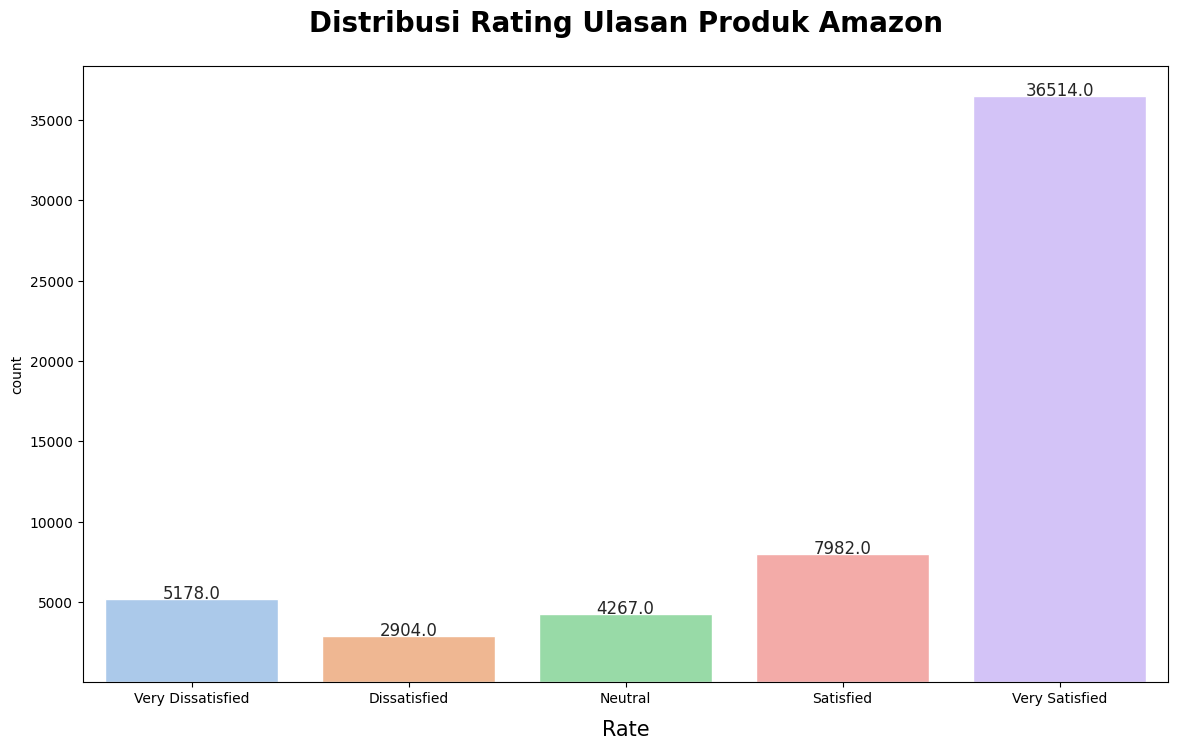

In [ ]:
# visualisasi bar chart untuk melihat jumlah rating ulasan produk Amazon
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1,2,3,4)
labels = ("Very Dissatisfied","Dissatisfied","Neutral","Satisfied","Very Satisfied")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="Score", data=df, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.title('Distribusi Rating Ulasan Produk Amazon', fontsize=20, fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

Dapat dilihat bahwa dengan unggul sebanyak 36.514 orang memberikan rating skor "very satisfied" dengan produk Amazon yang diterima.

Selanjutnya, akan **drop kolom** data yang tidak memberikan informasi terhadap analisis sentimen yang akan dilakukan.

In [ ]:
df.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time','Summary'], axis=1, inplace=True)

In [ ]:
print(df.columns)

Index(['Text'], dtype='object')


In [ ]:
df.head()

,Text
0,Having tried a couple of other brands of glute...
1,My cat loves these treats. If ever I can't fin...
2,A little less than I expected. It tends to ha...
3,"First there was Frosted Mini-Wheats, in origin..."
4,and I want to congratulate the graphic artist ...


# Data Preparation

Mengubah seluruh entri teks menjadi lower case atau huruf kecil.

In [ ]:
#case folding
# merubah jenis huruf menjadi huruf kecil
def lowercase(review_text):
  low = review_text.lower()
  return low

df['clean_review'] = df['Text'].apply(lambda low:lowercase(str(low)))

Membuang emoji apabila ada.

In [ ]:
#remove emoji

# menghapus emoji menggunakan regex dan nilai unicode dari emoji

def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

df['clean_review'] = df['clean_review'].apply(lambda emoji: remove_emoji(emoji))

menghapus hashtag diberikan oleh pengguna.

In [ ]:
# menghapus hashtag

def remove_hashtag(review_text, default_replace=""):
  hashtag = re.sub(r'#\w+', default_replace, review_text)
  return hashtag

df['clean_review'] = df['clean_review'].apply(lambda hashtag: remove_hashtag(hashtag))

Menghapus angka.

In [ ]:
# menghapus angka

def remove_number(review_text, default_replace=" "):
  num = re.sub(r'\d+', default_replace, review_text)
  return num

df['clean_review'] = df['clean_review'].apply(lambda num: remove_number(num))

Menghapus tanda baca

In [ ]:
# menghapus tanda baca

def remove_punctuation(review_text, default_text=" "):
  list_punct = string.punctuation
  delete_punct = str.maketrans(list_punct,' '*len(list_punct))
  new_review = ' '.join(review_text.translate(delete_punct).split())

  return new_review

df['clean_review'] = df['clean_review'].apply(lambda punct: remove_punctuation(punct))

In [ ]:
# menghapus superscript (pengulangan kata)

def remove_superscript(review_text):
  number = re.compile("["u"\U00002070"
                      u"\U000000B9"
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"U0000200D"
                      "]+", flags=re.UNICODE)
  return number.sub(r'', review_text)

df['clean_review'] = df['clean_review'].apply(lambda num: remove_superscript(num))

In [ ]:
# melakukan pembatasan jumlah huruf menjadi dua untuk mengembalikan kata

def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

df['clean_review'] = df['clean_review'].apply(lambda word: word_repetition(word))

In [ ]:
# melakukan pembatasan kata berulang menjadi satu kali, seperti suka suka -> suka

def repetition(review_text):
  repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1',review_text, flags=re.IGNORECASE)
  return repeat

df['clean_review'] = df['clean_review'].apply(lambda word: repetition(word))

In [ ]:
# menghapus spasi berlebih dalam ulasan

def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

df['clean_review'] = df['clean_review'].apply(lambda extra_spaces: remove_extra_whitespaces(extra_spaces))

**Download Library untuk Stopwords.**

In [ ]:
# Stop words present in the library
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
nltk.download('omw-1.4')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer

from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from yellowbrick.text import FreqDistVisualizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=a5326b2bc61a1054c09f555bc802c2037aaa5f2126b3a8eaa92b54530f2b5597
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
import swifter


In [ ]:
#stopwords
def remove_stopwords(text):
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['hi', 'im']
    text_filtered = [word for word in text if not word in useless_words]
    final_string = ' '.join(text_filtered)
    return final_string
df['no_stopwords'] = df['clean_review'].swifter.apply(lambda x: remove_stopwords(x))

Pandas Apply:   0%|          | 0/56845 [00:00<?, ?it/s]

In [ ]:
#tokenize
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
df['review_tokenized'] = df['no_stopwords'].swifter.apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Pandas Apply:   0%|          | 0/56845 [00:00<?, ?it/s]

In [ ]:
#stemming
from nltk.stem import PorterStemmer
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    final_string = ' '.join(stem_text)
    return final_string
porter_stemmer = PorterStemmer()
df['review_stemmed'] = df['review_tokenized'].swifter.apply(lambda x: stemming(x))

Pandas Apply:   0%|          | 0/56845 [00:00<?, ?it/s]

In [ ]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
     lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
     return lemm_text
df['review_lemmatized'] = df['review_stemmed'].swifter.apply(lambda x: lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


Pandas Apply:   0%|          | 0/56845 [00:00<?, ?it/s]

In [ ]:
#melihat data bersih
df.head()

,Text,clean_review,no_stopwords,review_tokenized,review_stemmed,review_lemmatized
0,Having tried a couple of other brands of glute...,having tried a couple of other brands of glute...,tried couple brands gluten free sandwich cooki...,"[tried, couple, brands, gluten, free, sandwich...",tri coupl brand gluten free sandwich cooki bes...,"[t, r, i, , c, o, u, p, l, , b, r, a, n, d, ..."
1,My cat loves these treats. If ever I can't fin...,my cat loves these treats if ever i can t find...,cat loves treats ever find house pop top bolts...,"[cat, loves, treats, ever, find, house, pop, t...",cat love treat ever find hous pop top bolt whe...,"[c, a, t, , l, o, v, e, , t, r, e, a, t, , ..."
2,A little less than I expected. It tends to ha...,a little less than i expected it tends to have...,little less expected tends muddy taste expecte...,"[little, less, expected, tends, muddy, taste, ...",littl less expect tend muddi tast expect sinc ...,"[l, i, t, t, l, , l, e, s, s, , e, x, p, e, ..."
3,"First there was Frosted Mini-Wheats, in origin...",first there was frosted mini wheats in origina...,first frosted mini wheats original size froste...,"[first, frosted, mini, wheats, original, size,...",first frost mini wheat origin size frost mini ...,"[f, i, r, s, t, , f, r, o, s, t, , m, i, n, ..."
4,and I want to congratulate the graphic artist ...,and i want to congratulate the graphic artist ...,want congratulate graphic artist putting entir...,"[want, congratulate, graphic, artist, putting,...",want congratul graphic artist put entir produc...,"[w, a, n, t, , c, o, n, g, r, a, t, u, l, , ..."


Data telah dibersihkan menggunakan stopwords, tokenisasi, stemming, dan lematisasi. Selanjutnya, akan dilihat visualisasi menggunakan wordcloud.

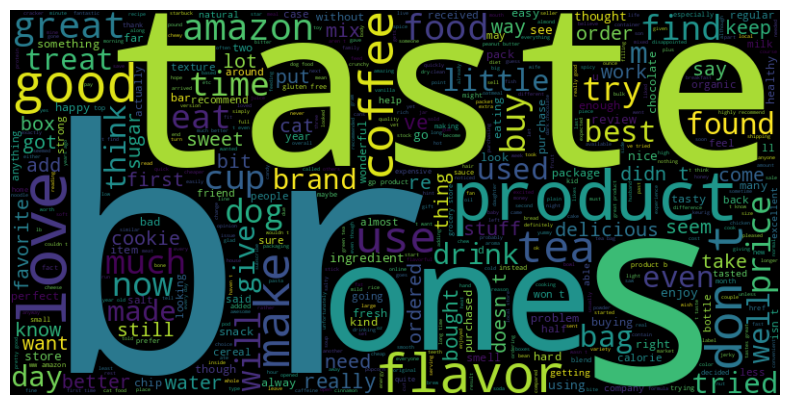

In [ ]:
# menampilkan kata dengan jumlah kemunculan yang paling dibahas oleh pengguna

all_text = ' '.join(df['clean_review'])

# Membuat objek WordCloud dengan 500 kata terbanyak
wc = WordCloud(width=800, height=400, max_words=500).generate(all_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Analisis Sentimen

Pemberian label sentimen dengan menerapkan metode yang berbasis lexicon atau biasa dikenal dengan **lexicon-based method**. Kamus yang digunakan adalah InSet Lexicon yang terdiri dari kamus positif dan negatif.

In [ ]:
!gdown --id 1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ
To: /content/lexicon_positive_ver1.csv
100% 41.4k/41.4k [00:00<00:00, 68.3MB/s]


In [ ]:
!gdown --id 1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju
To: /content/lexicon_negative_ver1.csv
100% 82.8k/82.8k [00:00<00:00, 3.35MB/s]


In [ ]:
#Membaca
lexicon_positive = dict()
import csv
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

In [ ]:
def sentiment_analysis_lexicon(text):
  score = 0
  for word_pos in text:
    if (word_pos in lexicon_positive):
      score = score + lexicon_positive[word_pos]
  for word_neg in text:
    if (word_neg in lexicon_negative):
      score = score + lexicon_negative[word_neg]
  polarity=''
  if (score > 0):
    polarity = 'positive'
  elif (score < 0):
    polarity = 'negative'
  else:
    polarity = 'neutral'

  return score, polarity

In [ ]:
#terapkan ke data yang telah di stemming
df['prepos_text'] = df.review_stemmed.str.split()

Ulasan awalnya dinilai dengan memberikan skor berdasarkan bobot kata yang ada dalam kamus. **Kata-kata positif diberi skor +5 dan kata-kata negatif diberi skor -5.** Setelah itu, skor ulasan dihitung dengan menjumlahkan skor dari setiap kata, dan kemudian ulasan tersebut dikelompokkan menjadi sentimen positif, negatif, atau netral. Sentimen netral mengindikasikan bahwa hasil kalkulasi skor ulasan adalah 0. Nanti, netral akan dihapus.

In [ ]:
results = df['prepos_text'].apply(sentiment_analysis_lexicon)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

positive    38586
negative    11101
neutral      7158
Name: polarity, dtype: int64


Dapat terlihat bahwa ulasan bernilai positif ada sekitar 38.586, negatif sebanyak 11.101, dan neutral memiliki skor 0 adalah 7.158.

<Axes: xlabel='polarity', ylabel='count'>

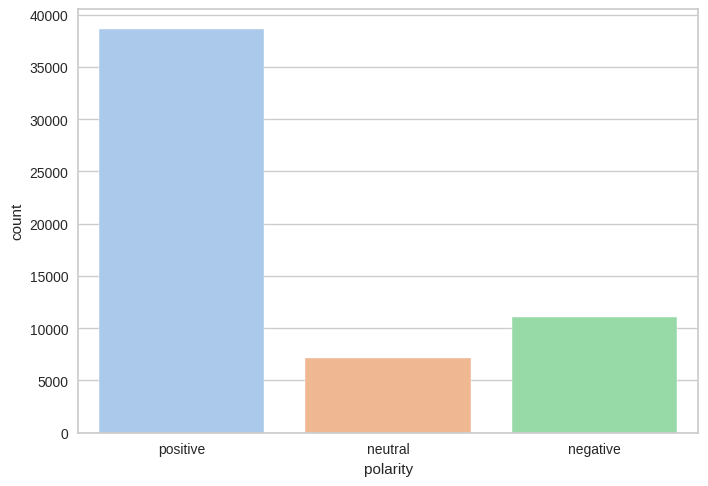

In [ ]:
sns.countplot(x=df['polarity'],palette="pastel")

In [ ]:
df.head()

,Text,clean_review,no_stopwords,review_tokenized,review_stemmed,review_lemmatized,prepos_text,polarity_score,polarity
0,Having tried a couple of other brands of glute...,having tried a couple of other brands of glute...,tried couple brands gluten free sandwich cooki...,"[tried, couple, brands, gluten, free, sandwich...",tri coupl brand gluten free sandwich cooki bes...,"[t, r, i, , c, o, u, p, l, , b, r, a, n, d, ...","[tri, coupl, brand, gluten, free, sandwich, co...",22,positive
1,My cat loves these treats. If ever I can't fin...,my cat loves these treats if ever i can t find...,cat loves treats ever find house pop top bolts...,"[cat, loves, treats, ever, find, house, pop, t...",cat love treat ever find hous pop top bolt whe...,"[c, a, t, , l, o, v, e, , t, r, e, a, t, , ...","[cat, love, treat, ever, find, hous, pop, top,...",23,positive
2,A little less than I expected. It tends to ha...,a little less than i expected it tends to have...,little less expected tends muddy taste expecte...,"[little, less, expected, tends, muddy, taste, ...",littl less expect tend muddi tast expect sinc ...,"[l, i, t, t, l, , l, e, s, s, , e, x, p, e, ...","[littl, less, expect, tend, muddi, tast, expec...",0,neutral
3,"First there was Frosted Mini-Wheats, in origin...",first there was frosted mini wheats in origina...,first frosted mini wheats original size froste...,"[first, frosted, mini, wheats, original, size,...",first frost mini wheat origin size frost mini ...,"[f, i, r, s, t, , f, r, o, s, t, , m, i, n, ...","[first, frost, mini, wheat, origin, size, fros...",28,positive
4,and I want to congratulate the graphic artist ...,and i want to congratulate the graphic artist ...,want congratulate graphic artist putting entir...,"[want, congratulate, graphic, artist, putting,...",want congratul graphic artist put entir produc...,"[w, a, n, t, , c, o, n, g, r, a, t, u, l, , ...","[want, congratul, graphic, artist, put, entir,...",13,positive


Karena fokus dari sentiment analysis adalah membedakan mana comment bersifat positif dan negatif, maka sentiment netral dihapus.

In [ ]:
# menghapus content yang bersentimen netral.
df = df.drop(df[df['polarity'] == 'neutral'].index)
df = df.reset_index(drop=True)

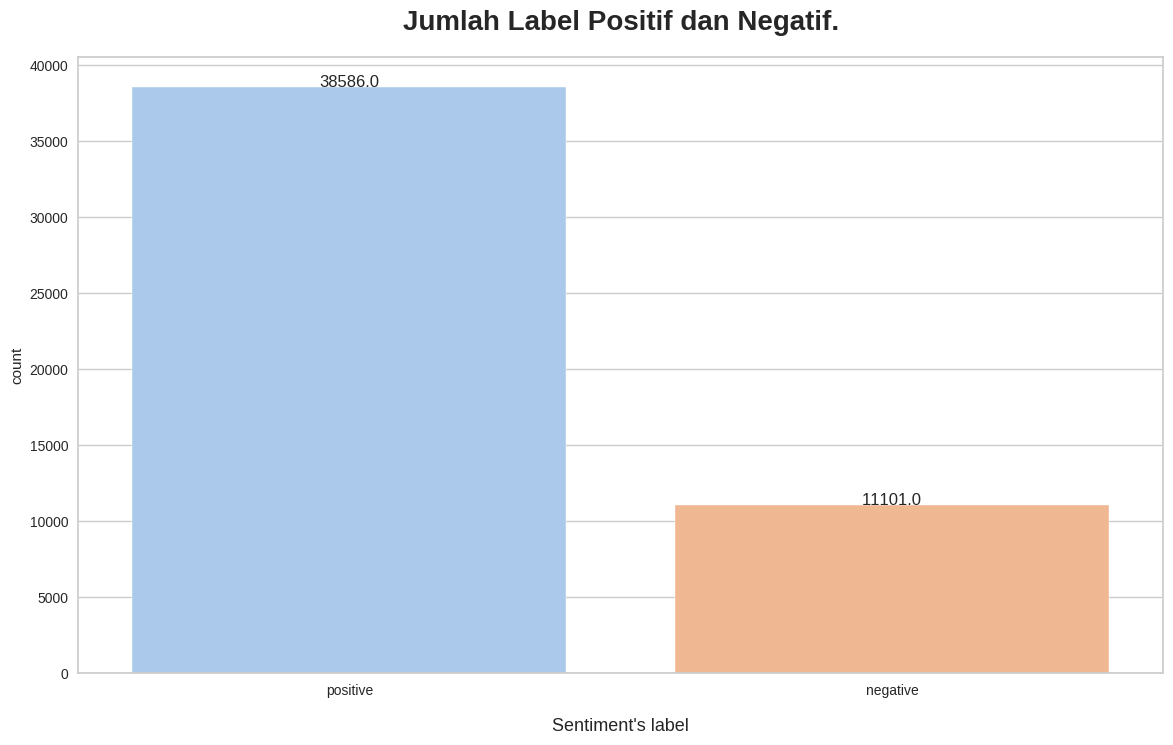

In [ ]:
#visualisasi sentimental analysis
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='polarity', data=df, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Jumlah Label Positif dan Negatif.", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

Ulasan bersifat positif lebih banyak dibanding negatif.

Selanjutnya, akan di generalisasi dengan membuat konversi nilai
- 1 untuk positif
- (-1) untuk negatif

In [ ]:
polarity = []
for convert in df['polarity']:
  if convert == "positive":
    num_polarity = 1
  else:
    num_polarity = -1

  polarity.append(num_polarity)
df['polarity'] = polarity

In [ ]:
df['polarity']

0        1
1        1
2        1
3        1
4        1
        ..
49682   -1
49683    1
49684    1
49685   -1
49686    1
Name: polarity, Length: 49687, dtype: int64

In [ ]:
df.polarity.value_counts()

 1    38586
-1    11101
Name: polarity, dtype: int64

In [ ]:
print("percentage of sentiment:")
train_pct_pos = df.polarity.value_counts()[1]/df.polarity.value_counts().sum()*100
print("percentage of positive sentiment:", round(train_pct_pos,2), '%')

train_pct_neg = df.polarity.value_counts()[-1]/df.polarity.value_counts().sum()*100
print("percentage of negative sentiment:", round(train_pct_neg,2), '%')

print("difference between percentage positive and negative:", round(train_pct_pos-train_pct_neg,2), '%')

percentage of sentiment:
percentage of positive sentiment: 77.66 %
percentage of negative sentiment: 22.34 %
difference between percentage positive and negative: 55.32 %


Persentase nilai sentimen bersifat positif lebih tinggi dibanding negatif.

**Visualisasi untuk Sentimen Analysis menggunakan WordCloud**

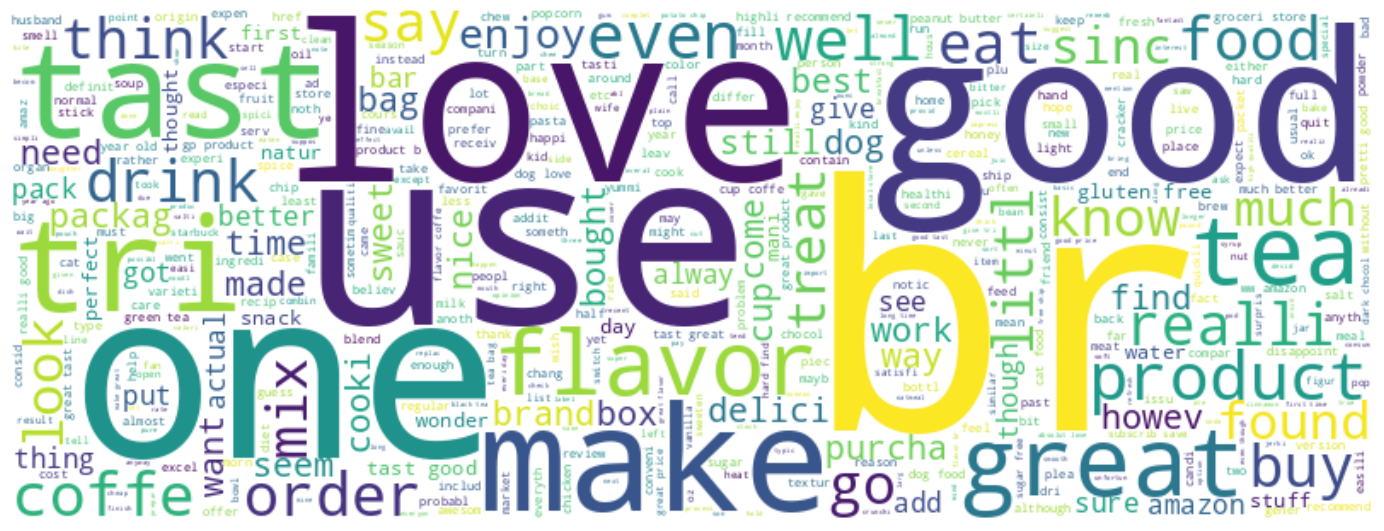

In [ ]:
#positive sentiment
sentiment_pos = ' '.join([review for review in df['review_stemmed'][df['polarity'] == 1]])
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

Dapat dilihat bahwa kata-kata seperti, 'Love','One','good','great'.'use','make','tea' dan lainnya dapat dikatakan sebagai sentimen analisis berbentuk positif dalam ulasan produk amazon.

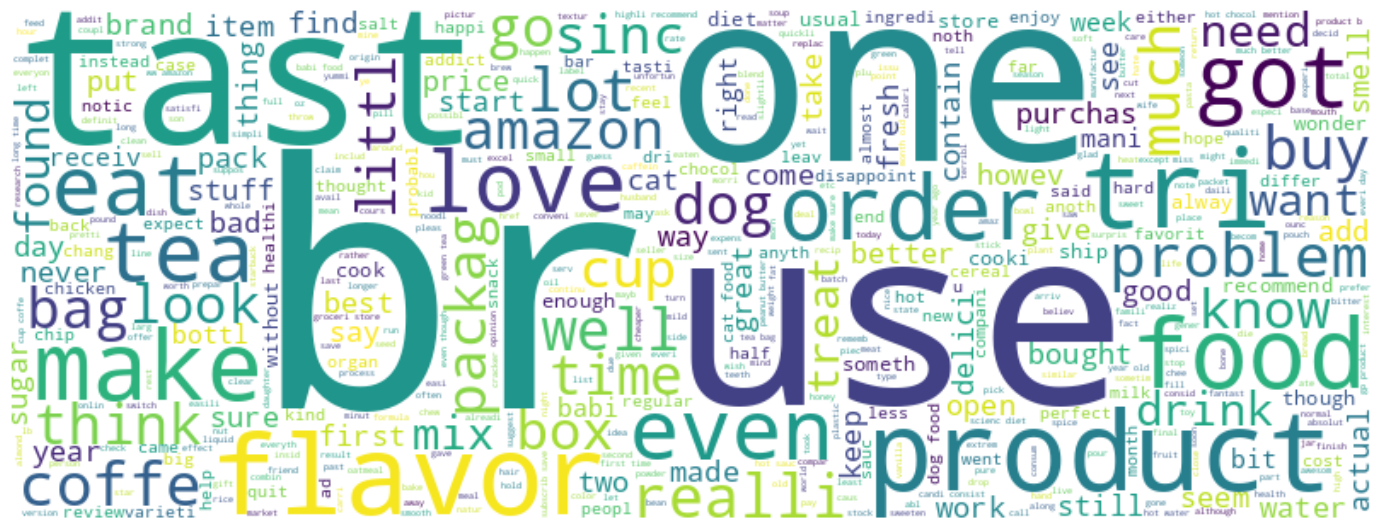

In [ ]:
#negative
sentiment_neg = ' '.join([review for review in df['review_stemmed'][df['polarity'] == -1]])

# create object wordcloud
w_neg = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_neg)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_neg, interpolation="bilinear")
plt.show()

Ulasan bersentiment negative banyak dimunculkan dengan kata, 'one','use','product','br','tast', dan masih banyak lagi sesuai pada plot di atas.

Menyimpan dataframe fiksasi kedalam bentuk excel.

In [ ]:
df.to_excel("amazon_fixed_df.xlsx", index=False)

# Machine Learning

**Split Review into Data Train and Test**

In [ ]:
X = df['review_stemmed']
y = df['polarity']

In [ ]:
X.head()

0    tri coupl brand gluten free sandwich cooki bes...
1    cat love treat ever find hous pop top bolt whe...
2    first frost mini wheat origin size frost mini ...
3    want congratul graphic artist put entir produc...
4    absolut love yorkshir tea glad avail amazon cu...
Name: review_stemmed, dtype: object

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: polarity, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=20)

In [ ]:
X_train.shape

(44718,)

In [ ]:
X_test.shape

(4969,)

In [ ]:
X_train

32090    use dri appl make southern fri pie work fantas...
46203    misunderstand drink includ best answer choos d...
46360    chew seem keep cat teeth healthi oldest cat te...
14792    final great coffe thank good starbuck final ga...
21120    month ago research differ food final decid pur...
                               ...                        
23452    cure oliv wish could learn good job graber har...
23775    dog mani food allergi far troubl treat whole p...
37135    ad dairi free soy free mini choc chip chop pec...
27098    best thai curri ever br make make thai curri s...
48483    pasta pleasantli surpris much better compar ri...
Name: review_stemmed, Length: 44718, dtype: object

**Mencari parameter** untuk data splitting terbaik akan menghasilkan nilai akurasi paling tinggi dan meminimalisir model melakukan kesalahan prediksi.

In [ ]:
test_num = []
random_num = []
acc_num = []
re_num = []
pre_num = []
matrix = []
report = []

random_state_values = [0, 5, 10]
sample_sizes = [0.1, 0.2, 0.3]

for test in sample_sizes:
    for random in random_state_values:
        print("test size:", test)
        print("random state:", random)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=random)
        vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
        X_train_vect = vectorizer.fit_transform(X_train)
        X_test_vect = vectorizer.transform(X_test)
        SVM = SVC(kernel='linear')
        SVM.fit(X_train_vect, y_train)

        train_score = SVM.score(X_train_vect, y_train)
        predict = SVM.predict(X_test_vect)
        accuracy = accuracy_score(y_test, predict)
        confusion = confusion_matrix(y_test, predict)
        classification = classification_report(y_test, predict)
        recall = recall_score(y_test, predict)
        precision = precision_score(y_test, predict)

        # Save evaluation results to lists
        test_num.append(test)
        random_num.append(random)
        acc_num.append(accuracy)
        re_num.append(recall)
        pre_num.append(precision)
        matrix.append(confusion)
        report.append(classification)

        print("Train Score:", train_score)
        print('Confusion Matrix:\n', confusion)
        print(classification)
        print("Accuracy Score:", accuracy.round(2))
        print("Recall Score:", recall)
        print("Precision Score:", precision)
        print("\n")

print("=================================================================")

test size: 0.1
random state: 0
Train Score: 0.99212844939398
Confusion Matrix:
 [[1048   86]
 [  22 3813]]
              precision    recall  f1-score   support

          -1       0.98      0.92      0.95      1134
           1       0.98      0.99      0.99      3835

    accuracy                           0.98      4969
   macro avg       0.98      0.96      0.97      4969
weighted avg       0.98      0.98      0.98      4969

Accuracy Score: 0.98
Recall Score: 0.9942633637548892
Precision Score: 0.9779430623236728


test size: 0.1
random state: 5
Train Score: 0.9921060870343038
Confusion Matrix:
 [[ 980   85]
 [  20 3884]]
              precision    recall  f1-score   support

          -1       0.98      0.92      0.95      1065
           1       0.98      0.99      0.99      3904

    accuracy                           0.98      4969
   macro avg       0.98      0.96      0.97      4969
weighted avg       0.98      0.98      0.98      4969

Accuracy Score: 0.98
Recall Score: 0.9

Based on the findings the optimal test_size and random_state parameters, it was found that setting test_size = 0.1 and random_state = 5 resulted in higher accuracy (0.98), recall (0.994), and precision values (0.978) compared to other sizes. Therefore, these settings will be used for dataset splitting.

In [ ]:
# memasukkan data ke dalam dataframe

data = {'test_size':test_num,
        'random_state':random_num,
        'confusion_matrix': matrix,
        'accuracy': acc_num,
        'recall': re_num,
        'precision': pre_num}

optimal = pd.DataFrame(data)
optimal

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[1048, 86], [22, 3813]]",0.978265,0.994263,0.977943
1,0.1,5,"[[980, 85], [20, 3884]]",0.978869,0.994877,0.978584
2,0.1,10,"[[1035, 95], [29, 3810]]",0.975045,0.992446,0.975672
3,0.2,0,"[[2052, 191], [56, 7639]]",0.975146,0.992723,0.975607
4,0.2,5,"[[1968, 183], [72, 7715]]",0.974341,0.990754,0.976830
5,0.2,10,"[[2064, 203], [68, 7603]]",0.972731,0.991135,0.973994
6,0.3,0,"[[3019, 312], [98, 11478]]",0.972496,0.991534,0.973537
7,0.3,5,"[[2952, 295], [109, 11551]]",0.972899,0.990652,0.975097
8,0.3,10,"[[2929, 347], [111, 11520]]",0.969276,0.990457,0.970759


In [ ]:
# mengatur desimal akurasi, recall, dan precision menjadi 2 angka dibelakang koma

optimal['accuracy'] = optimal['accuracy'].apply(lambda floats:format(float(floats), ".2f"))
optimal['recall'] = optimal['recall'].apply(lambda floats:format(float(floats), ".2f"))
optimal['precision'] = optimal['precision'].apply(lambda floats:format(float(floats), ".2f"))
optimal['test_size'] = optimal['test_size'].apply(lambda floats:format(float(floats), ".1f"))
optimal

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[1048, 86], [22, 3813]]",0.98,0.99,0.98
1,0.1,5,"[[980, 85], [20, 3884]]",0.98,0.99,0.98
2,0.1,10,"[[1035, 95], [29, 3810]]",0.98,0.99,0.98
3,0.2,0,"[[2052, 191], [56, 7639]]",0.98,0.99,0.98
4,0.2,5,"[[1968, 183], [72, 7715]]",0.97,0.99,0.98
5,0.2,10,"[[2064, 203], [68, 7603]]",0.97,0.99,0.97
6,0.3,0,"[[3019, 312], [98, 11478]]",0.97,0.99,0.97
7,0.3,5,"[[2952, 295], [109, 11551]]",0.97,0.99,0.98
8,0.3,10,"[[2929, 347], [111, 11520]]",0.97,0.99,0.97


Visualisasi grafik untuk melihat **kenaikan akurasi terbaik berdasarkan test_size**

In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='accuracy',color='test_size',
              text='accuracy', markers=True)
fig.update_traces(textposition='top left')
fig.show()

Visualisasi grafik untuk melihat **kenaikan recall terbaik berdasarkan test_size**

In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='recall',color='test_size',
              text='recall', markers=True)
fig.update_traces(textposition='top left')
fig.show()

Visualisasi grafik untuk melihat **kenaikan precision terbaik berdasarkan test_size**

In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='precision',color='test_size',
              text='precision', markers=True)
fig.update_traces(textposition='top left')
fig.show()

# Vector Representation

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
dense_num = X_train_vect.todense()

In [ ]:
y_train.shape

(34780,)

In [ ]:
print(X_train_vect)

  (0, 16799)	0.19848456831708386
  (0, 5183)	0.18289535334974952
  (0, 20586)	0.06946861313589085
  (0, 9428)	0.12826588020605276
  (0, 11119)	0.18983235141136134
  (0, 4449)	0.23170194925843346
  (0, 19237)	0.1610809515795883
  (0, 393)	0.1957348197263104
  (0, 22553)	0.3247450401229025
  (0, 7302)	0.130469336439751
  (0, 7946)	0.23633063718418953
  (0, 8394)	0.2807195367938454
  (0, 5107)	0.10876088907712647
  (0, 15245)	0.13625301421129637
  (0, 9935)	0.23500248942104848
  (0, 16604)	0.23054471196801427
  (0, 3934)	0.16039626514269428
  (0, 23303)	0.11675339559150857
  (0, 12092)	0.12011856473774535
  (0, 21383)	0.1854012073778712
  (0, 20304)	0.23965496233071656
  (0, 16224)	0.0795245054365852
  (0, 5496)	0.2958739382404145
  (0, 8125)	0.18637985126203455
  (0, 12347)	0.08935177215249382
  :	:
  (34778, 16309)	0.11750629296870774
  (34778, 13685)	0.10181117705675327
  (34778, 16874)	0.07555973924449753
  (34778, 6268)	0.0777314813737772
  (34778, 12110)	0.17255993035298117
  (34778

In [ ]:
df_tf = pd.DataFrame(X_train_vect.todense(), columns=vectorizer.get_feature_names_out())

# Save the DataFrame as a CSV file
df_tf.to_csv('tfidf.csv', index=False)

print("CSV file saved successfully.")

CSV file saved successfully.


# Data Modeling

SVM adalah model pembelajaran mesin yang digunakan untuk tugas klasifikasi dan regresi, terutama efektif untuk data dengan jumlah fitur yang besar. SVM bekerja dengan mencari pemisah linier yang optimal antara kelas-kelas data yang berbeda, sehingga dapat memisahkan data dengan akurat.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_vect, y_train)

SVC(kernel='linear')

In [ ]:
predict = svm.predict(X_test_vect)
predict

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
predict_df = pd.DataFrame(predict, columns=['predict'])
predict_df

,predict
0,1
1,1
2,1
3,-1
4,1
...,...
14902,1
14903,1
14904,1
14905,1


In [ ]:
print(svm.coef_)

  (0, 21574)	0.11341503271863766
  (0, 21502)	0.1065533151936057
  (0, 18132)	0.11341503271863766
  (0, 15118)	0.11341503271863766
  (0, 6980)	0.11341503271863766
  (0, 8860)	0.3627558105346726
  (0, 17813)	0.014906897045597344
  (0, 16469)	0.032975911680497356
  (0, 5352)	0.015490418804557326
  (0, 12358)	0.104205026460735
  (0, 2822)	0.09749453176647932
  (0, 2446)	0.1109155211549907
  (0, 20997)	0.47288250871699533
  (0, 8913)	0.3140547017338446
  (0, 2662)	0.33727257022866824
  (0, 21449)	0.05852423647733193
  (0, 20560)	0.054983464416966145
  (0, 16000)	0.05852423647733193
  (0, 10150)	0.10996692883393229
  (0, 5959)	0.05852423647733193
  (0, 10698)	0.1352072133253828
  (0, 23648)	0.22357411555646886
  (0, 17957)	0.2091766055018084
  (0, 10469)	0.23797162561112933
  (0, 16159)	0.20850566077422364
  :	:
  (0, 19236)	0.5487838305968507
  (0, 19077)	-0.6370470255556294
  (0, 19046)	-0.255989437716681
  (0, 18058)	3.341866700588048
  (0, 17500)	-5.994912646926579
  (0, 16363)	-0.32081

In [ ]:
print(svm.intercept_) # values of b

[0.20869401]


In [ ]:
print(svm.classes_) # class of sentiment

[-1  1]


In [ ]:
print(svm.dual_coef_)

  (0, 0)	-1.0
  (0, 1)	-1.0
  (0, 2)	-1.0
  (0, 3)	-1.0
  (0, 4)	-1.0
  (0, 5)	-1.0
  (0, 6)	-0.11521638576052948
  (0, 7)	-1.0
  (0, 8)	-1.0
  (0, 9)	-0.6942000854320698
  (0, 10)	-1.0
  (0, 11)	-1.0
  (0, 12)	-1.0
  (0, 13)	-1.0
  (0, 14)	-1.0
  (0, 15)	-1.0
  (0, 16)	-1.0
  (0, 17)	-0.7935832518830032
  (0, 18)	-0.5514005142644999
  (0, 19)	-1.0
  (0, 20)	-0.6350447619770822
  (0, 21)	-0.09333891399981022
  (0, 22)	-1.0
  (0, 23)	-1.0
  (0, 24)	-1.0
  :	:
  (0, 8892)	0.5373262009216572
  (0, 8893)	0.2585704998413993
  (0, 8894)	1.0
  (0, 8895)	0.36342731514263865
  (0, 8896)	1.0
  (0, 8897)	1.0
  (0, 8898)	1.0
  (0, 8899)	0.0007089435089692211
  (0, 8900)	1.0
  (0, 8901)	0.9080799615306945
  (0, 8902)	0.7168921203754527
  (0, 8903)	1.0
  (0, 8904)	1.0
  (0, 8905)	0.5817783073237126
  (0, 8906)	1.0
  (0, 8907)	0.8431381835958254
  (0, 8908)	1.0
  (0, 8909)	0.43774093595564545
  (0, 8910)	0.1252422261547458
  (0, 8911)	1.0
  (0, 8912)	0.1512292315462626
  (0, 8913)	1.0
  (0, 8914)	0.0

In [ ]:
svm.score(X_train_vect, y_train) # the mean accuracy on the given train data and labels.

0.9908280621046579

In [ ]:
svm.score(X_test_vect, y_test) # the mean accuracy on the given test data and labels.

0.9692761789763199

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predict))

0.1228952840947206


# Visualize from Predicted Results

In [ ]:
predict_df = pd.DataFrame(predict, columns=['predictvalues'])
polarity = ""
sentimen = []
for sentiment in predict_df['predictvalues']:
  if sentiment == 1:
    polarity = "positive"
  else:
    polarity = "negative"

  sentimen.append(polarity)

predict_df['sentiment'] = sentimen

print(predict_df.predictvalues.value_counts()[1])
print(predict_df.predictvalues.value_counts()[-1])

11867
3040


In [ ]:
prediction_df_group = predict_df.groupby(['predictvalues'])[['sentiment']].count().reset_index()
prediction_df_group

,predictvalues,sentiment
0,-1,3040
1,1,11867


In [ ]:
print("Number of sentiment after modelling:")
sen_pos = predict_df.predictvalues.value_counts()[1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of positive sentiment:", round(sen_pos,2), '%')

sen_neg = predict_df.predictvalues.value_counts()[-1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of negative sentiment:", round(sen_neg,2), '%')

print("difference between percentage positive and negative:", round(sen_pos-sen_neg,2), '%')

Number of sentiment after modelling:
percentage of positive sentiment: 79.61 %
percentage of negative sentiment: 20.39 %
difference between percentage positive and negative: 59.21 %


Plot menggunakan **Pie Chart**

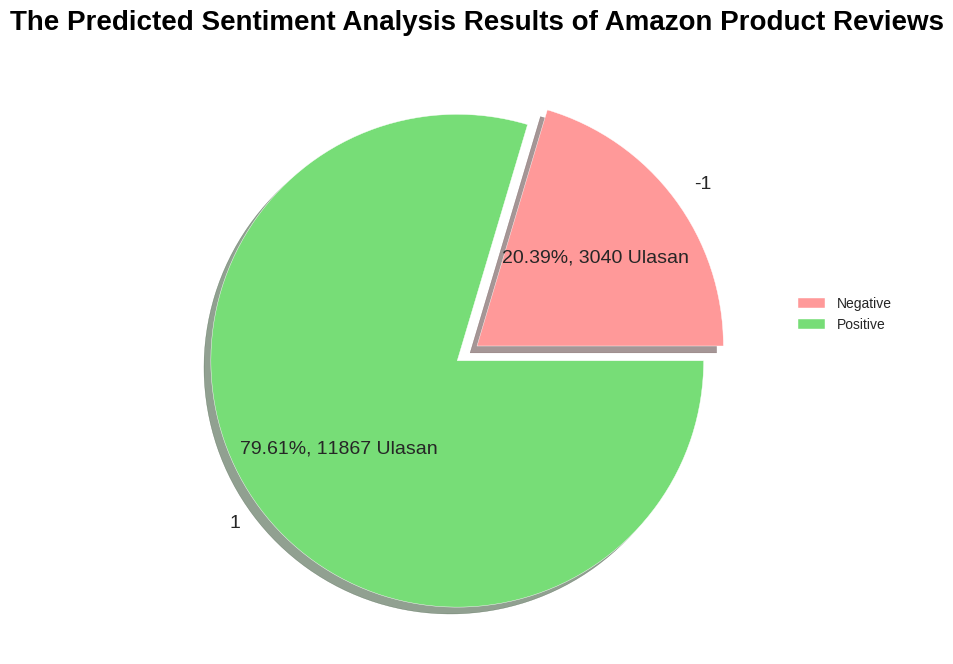

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0.1)
my_colors = ['#ff9999','#77dd77']
ax.pie(prediction_df_group.sentiment, labels=prediction_df_group.predictvalues,
         autopct=lambda p:f'{p:.2f}%, {p*sum(prediction_df_group.sentiment)/100 :.0f} Ulasan', explode=explode, shadow=True, colors=my_colors,
          startangle=0, textprops={'fontsize': 14})
ax.set_title('The Predicted Sentiment Analysis Results of Amazon Product Reviews', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Negative','Positive'])
plt.show()

The model successfully predicted the test data of reviews as positive sentiment with a percentage of 79.61%, or a total of 11.867 reviews, and negative sentiment with a percentage of 20.39%, or a total of 3040 reviews.

It can be seen that the **model predicts more new reviews as positive sentiment compared to negative.** The reason is that in the past, the model has learned and recognized more patterns in positive review data than negative, resulting in the model being less familiar with patterns in negative review data.

# Evaluation

In [ ]:
matrix = confusion_matrix(y_test, predict)
matrix

array([[ 2929,   347],
       [  111, 11520]])

**Confusion Matrix Visualization**

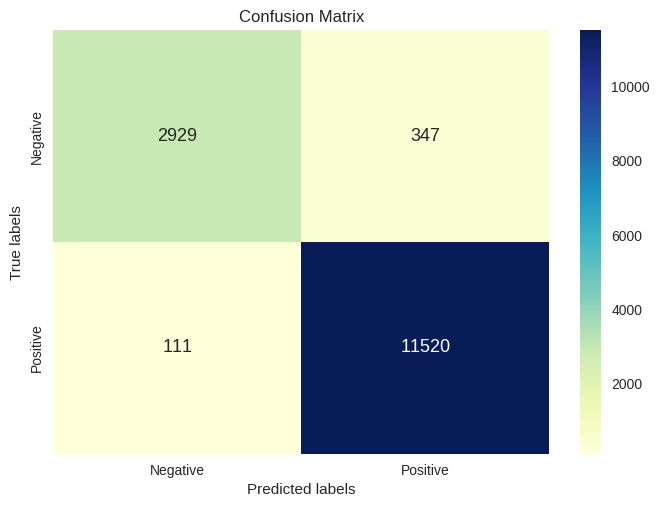

In [ ]:
ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            annot_kws={"fontsize":13})

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

In [ ]:
target_names = ['Negative','Positive']
print(classification_report(y_test, predict, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.96      0.89      0.93      3276
    Positive       0.97      0.99      0.98     11631

    accuracy                           0.97     14907
   macro avg       0.97      0.94      0.95     14907
weighted avg       0.97      0.97      0.97     14907



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

akurasi = accuracy_score(y_test, predict)
print("Accuracy model:", round(akurasi,2))

recall = recall_score(y_test, predict)
print("Recall model:", round(recall,2))

precision = precision_score(y_test, predict)
print("Precision model:", round(precision,2))

Accuracy model: 0.97
Recall model: 0.99
Precision model: 0.97


- **Accuracy model: 0.97**

This indicates that the **model correctly classified 97%** of the instances in the dataset, showing a **high level** of overall accuracy in predicting sentiment.

- **Recall model: 0.99**

The recall score of 0.99 suggests that the **model has a very high ability to correctly identify positive and negative instances, minimizing false negatives.**

- **Precision model: 0.97**

The precision score of 0.97 indicates that when the model predicts a sentiment (either positive or negative), it is correct 97% of the time. This implies a **low rate of false positives in the predictions**.

Overall, these results suggest that the sentiment analysis model performs exceptionally well, with high accuracy, recall, and precision, indicating its **effectiveness in accurately predicting sentiment in Amazon product reviews.**